In [168]:
import csv
import random
import math
import operator
import numpy as np
import matplotlib.pyplot as plt

In [169]:
def load_dataset(filename, split):
    learn_data = []
    test_data = []
    with open(filename, 'r') as file:
        lines = csv.reader(file)
        dataset = list(lines)
        for x in range(len(dataset) - 1):
            for y in range(4):
                dataset[x][y] = float(dataset[x][y])
            if random.random() < split:
                learn_data.append(dataset[x])
            else:
                test_data.append(dataset[x])

    return learn_data, test_data

In [170]:
def euclid(num1, num2, length):
    distance = 0
    for x in range(length):
        distance += np.power((num1[x] - num2[x]),2)
    return math.sqrt(distance)

In [171]:
def get_neighbors(learn_data, test_instance, k, cosine_d=False):
    distances = []
    length = len(test_instance) - 1
    for x in range(len(learn_data)):
            dist = euclid(test_instance, learn_data[x], length)
            distances.append((learn_data[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

In [172]:
def get_response(neighbors):
    class_votes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in class_votes:
            class_votes[response] += 1
        else:
            class_votes[response] = 1
    sorted_votes = sorted(class_votes.items(), key=operator.itemgetter(1), reverse=True)
    return sorted_votes[0][0]

In [173]:
def get_accuracy(test_data, predictions):
    correct = 0
    for x in range(len(test_data)):
        if test_data[x][-1] == predictions[x]:
            correct += 1
    return (correct / float(len(test_data))) * 100.0

learn_data=99
test_data=50
'Iris-setosa' vs 'Iris-setosa'
'Iris-setosa' vs 'Iris-setosa'
'Iris-setosa' vs 'Iris-setosa'
'Iris-setosa' vs 'Iris-setosa'
'Iris-setosa' vs 'Iris-setosa'
'Iris-setosa' vs 'Iris-setosa'
'Iris-setosa' vs 'Iris-setosa'
'Iris-setosa' vs 'Iris-setosa'
'Iris-setosa' vs 'Iris-setosa'
'Iris-setosa' vs 'Iris-setosa'
'Iris-setosa' vs 'Iris-setosa'
'Iris-setosa' vs 'Iris-setosa'
'Iris-setosa' vs 'Iris-setosa'
'Iris-setosa' vs 'Iris-setosa'
'Iris-setosa' vs 'Iris-setosa'
'Iris-setosa' vs 'Iris-setosa'
'Iris-setosa' vs 'Iris-setosa'
'Iris-versicolor' vs 'Iris-versicolor'
'Iris-versicolor' vs 'Iris-versicolor'
'Iris-versicolor' vs 'Iris-versicolor'
'Iris-versicolor' vs 'Iris-versicolor'
'Iris-versicolor' vs 'Iris-versicolor'
'Iris-versicolor' vs 'Iris-versicolor'
'Iris-versicolor' vs 'Iris-versicolor'
'Iris-versicolor' vs 'Iris-versicolor'
'Iris-versicolor' vs 'Iris-versicolor'
'Iris-virginica' vs 'Iris-versicolor'
'Iris-versicolor' vs 'Iris-versicolor'
'Iris-versicolor' 

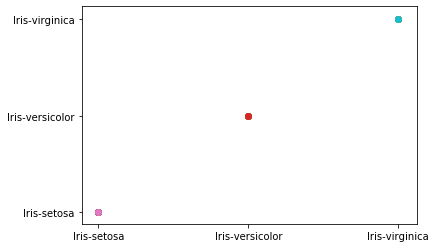

In [174]:
def main():
    split = 0.67
    learn_data, test_data = load_dataset('iris.data', split)
    print('learn_data=' + repr(len(learn_data)))
    print('test_data=' + repr(len(test_data)))
    predictions = []
    k = 3
    for x in range(len(test_data)):
        neighbors = get_neighbors(learn_data, test_data[x], k)
        result = get_response(neighbors)
        predictions.append(result)
        plt.scatter(predictions[x],predictions[x])
        print(repr(result) + ' vs ' + repr(test_data[x][-1]))
    accuracy = get_accuracy(test_data, predictions)
    print(repr(accuracy) + '%')
main()